Targets:  
*   Get the set-up right
*   Set Transforms, Data Loader, Training  & Test Loop
*   Add Batch-norm to increase model efficiency

Results:  
*   Parameters: 9k
*   Best Train Accuracy: 99.71
*   Best Test Accuracy: 99.14 (14th Epoch)

Analysis: Model is over-fitting after batch normalization


In [1]:
import torch
from torchvision import transforms

import torch.optim as optim

from model import Model_1, modelsummary
from utils import build_mnist, Trainer, plot_sampledata, evaluate_model

In [2]:
# CUDA?
torch.manual_seed(1)
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [3]:
# Train data transformations
train_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Test data transformations
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [4]:
batch_size = 128

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_mnist(
    set="train", transforms=train_transforms, **kwargs
)
test_data, test_loader = build_mnist(set="test", transforms=test_transforms, **kwargs)

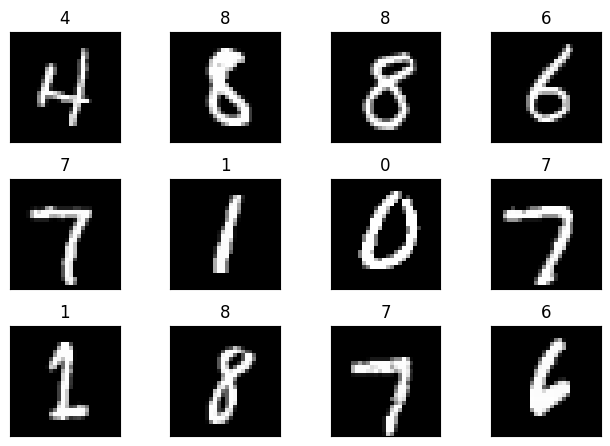

In [5]:
plot_sampledata(train_loader)

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Model_1().to(device)
modelsummary(model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
            Conv2d-4            [-1, 8, 24, 24]             576
       BatchNorm2d-5            [-1, 8, 24, 24]              16
              ReLU-6            [-1, 8, 24, 24]               0
            Conv2d-7           [-1, 16, 22, 22]           1,152
       BatchNorm2d-8           [-1, 16, 22, 22]              32
              ReLU-9           [-1, 16, 22, 22]               0
        MaxPool2d-10           [-1, 16, 11, 11]               0
           Conv2d-11            [-1, 8, 11, 11]             128
      BatchNorm2d-12            [-1, 8, 11, 11]              16
             ReLU-13            [-1, 8, 11, 11]               0
           Conv2d-14              [-1, 

Epoch 1


Train: Loss=0.0749 Batch_id=468 Accuracy=93.46: 100%|██████████| 469/469 [00:57<00:00,  8.11it/s]


Test set: Average loss: 0.0652, Accuracy: 9805/10000 (98.05%)

Epoch 2


Train: Loss=0.0357 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:57<00:00,  8.19it/s]


Test set: Average loss: 0.0558, Accuracy: 9833/10000 (98.33%)

Epoch 3


Train: Loss=0.0289 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:57<00:00,  8.22it/s]


Test set: Average loss: 0.0462, Accuracy: 9858/10000 (98.58%)

Epoch 4


Train: Loss=0.0523 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:56<00:00,  8.32it/s]


Test set: Average loss: 0.0418, Accuracy: 9868/10000 (98.68%)

Epoch 5


Train: Loss=0.0303 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:55<00:00,  8.47it/s]


Test set: Average loss: 0.0385, Accuracy: 9884/10000 (98.84%)

Epoch 6


Train: Loss=0.0746 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:58<00:00,  8.04it/s]


Test set: Average loss: 0.0473, Accuracy: 9857/10000 (98.57%)

Epoch 7


Train: Loss=0.0081 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:56<00:00,  8.35it/s]


Test set: Average loss: 0.0338, Accuracy: 9892/10000 (98.92%)

Epoch 8


Train: Loss=0.0029 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:56<00:00,  8.26it/s]


Test set: Average loss: 0.0345, Accuracy: 9894/10000 (98.94%)

Epoch 9


Train: Loss=0.0050 Batch_id=468 Accuracy=99.37: 100%|██████████| 469/469 [00:55<00:00,  8.38it/s]


Test set: Average loss: 0.0326, Accuracy: 9894/10000 (98.94%)

Epoch 10


Train: Loss=0.0045 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:54<00:00,  8.55it/s]


Test set: Average loss: 0.0343, Accuracy: 9890/10000 (98.90%)

Epoch 11


Train: Loss=0.0099 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:59<00:00,  7.91it/s]


Test set: Average loss: 0.0353, Accuracy: 9882/10000 (98.82%)

Epoch 12


Train: Loss=0.0508 Batch_id=468 Accuracy=99.55: 100%|██████████| 469/469 [00:54<00:00,  8.55it/s]


Test set: Average loss: 0.0349, Accuracy: 9891/10000 (98.91%)

Epoch 13


Train: Loss=0.0031 Batch_id=468 Accuracy=99.59: 100%|██████████| 469/469 [00:55<00:00,  8.38it/s]


Test set: Average loss: 0.0353, Accuracy: 9896/10000 (98.96%)

Epoch 14


Train: Loss=0.0024 Batch_id=468 Accuracy=99.62: 100%|██████████| 469/469 [00:55<00:00,  8.49it/s]


Test set: Average loss: 0.0329, Accuracy: 9914/10000 (99.14%)

Epoch 15


Train: Loss=0.0180 Batch_id=468 Accuracy=99.71: 100%|██████████| 469/469 [00:55<00:00,  8.40it/s]


Test set: Average loss: 0.0372, Accuracy: 9897/10000 (98.97%)

Set\t Max Acc@Epoch	 Last Epoch Acc
train	 99.71@15		99.71
test	 99.14@14		98.97


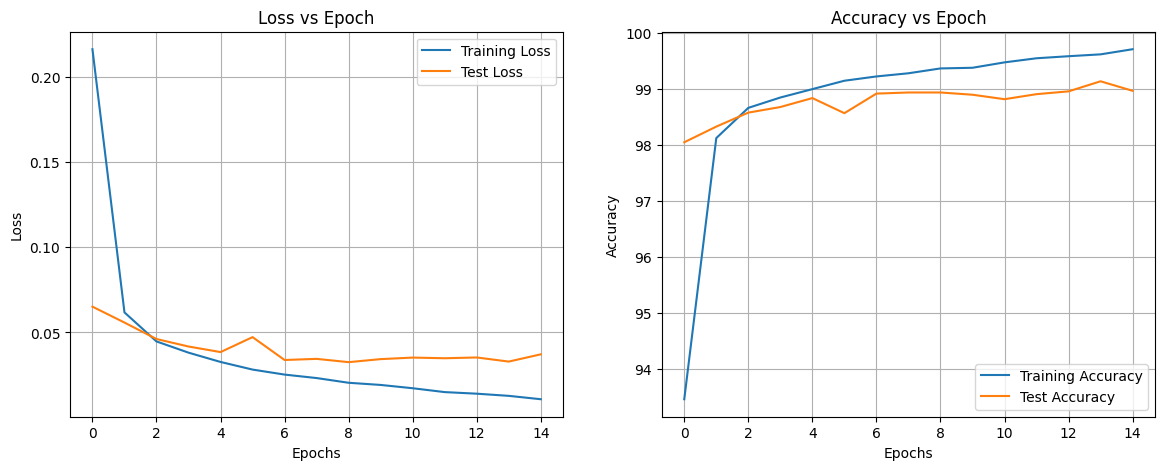

In [7]:
num_epochs = 15
model = Model_1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # large learning rate

trainer = Trainer(model, device, optimizer)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

trainer.plot_history()

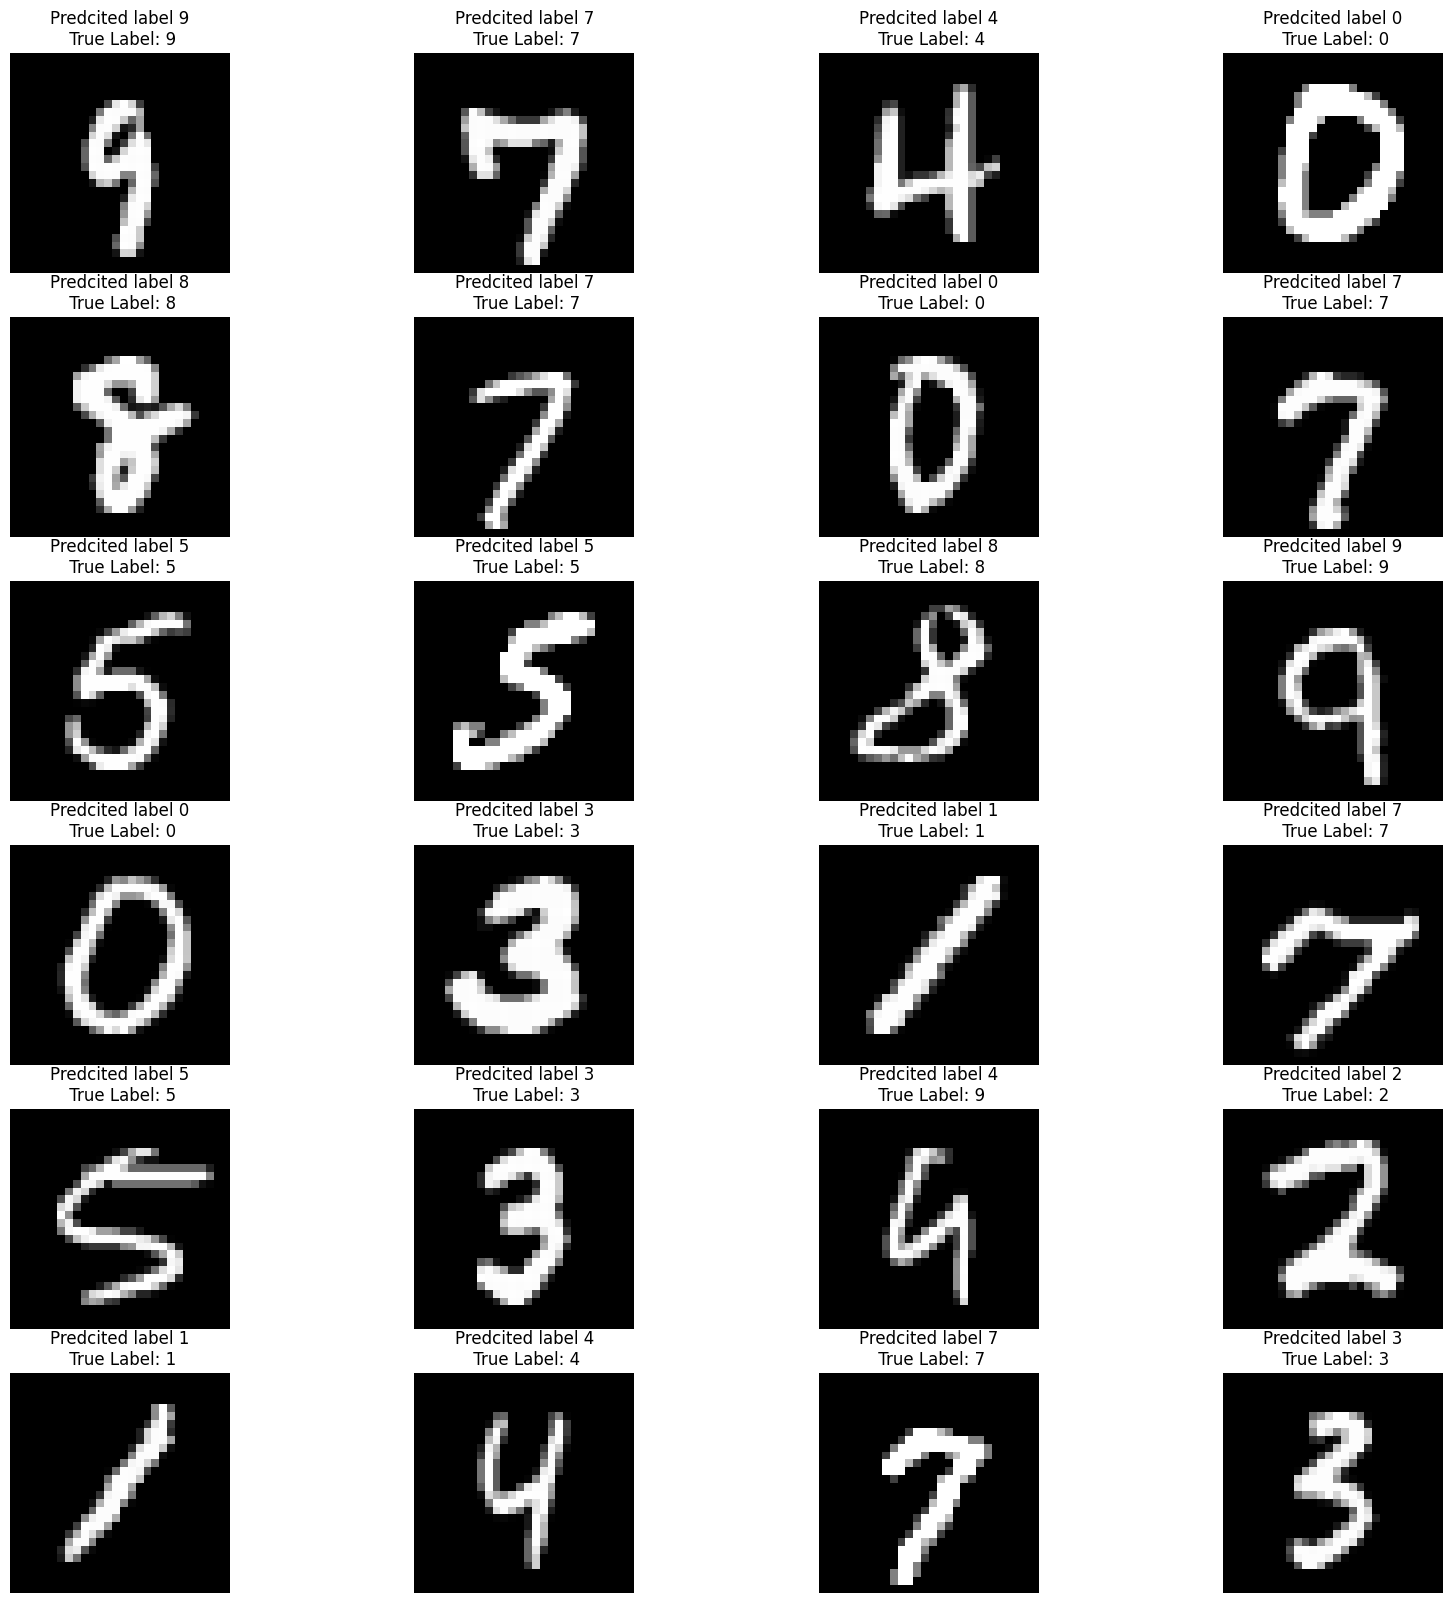

In [8]:
evaluate_model(trainer.model, test_loader, device)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
